# 决策树 Decision Trees

## 剪枝参数

### 预剪枝
- max_depth

　　限制树的最大深度，超过设定深度的树枝全部剪掉
　　这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效果再决定是否增加设定深度。

- min_samples_leaf

　　min_samples_leaf 限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生
　　一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。

- min_samples_split

　　min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。

- max_features

　　一般max_depth使用，用作树的”精修“
　　max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。

- min_impurity_decrease

　　min_impurity_decrease限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本种更新的功能，在0.19版本之前时使用min_impurity_split。

### 后剪枝 post-pruning
[7大后剪枝算法](https://blog.csdn.net/appleyuchi/article/details/83692381)
[7大后剪枝算法 - 源码](https://github.com/appleyuchi/Decision_Tree_Prune)

- ccp_alpha
CCP(Cost Complexity Pruning)
[ccp_alpha参数如何调优](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris,load_wine
from sklearn.model_selection import train_test_split

In [3]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier() # 决策树分类
clf = clf.fit(X, Y)

In [4]:
clf.predict([[2., 2.]])

array([1])

In [5]:
clf.predict_proba([[2., 2.]])



array([[0., 1.]])

In [25]:
X, y = load_wine(return_X_y = True)

train_X,test_X,train_y,test_y = train_test_split(X, y,test_size=0.3)

clf2 = tree.DecisionTreeClassifier()

clf2 = clf2.fit(train_X, train_y)

[Text(342.40909090909093, 498.3, '类黄酮 <= 1.265\ngini = 0.661\nsamples = 124\nvalue = [41, 48, 35]\nclass = 雪莉'),
 Text(152.1818181818182, 407.70000000000005, '颜色强度 <= 3.725\ngini = 0.149\nsamples = 37\nvalue = [0, 3, 34]\nclass = 贝尔摩德'),
 Text(76.0909090909091, 317.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 雪莉'),
 Text(228.27272727272728, 317.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 贝尔摩德'),
 Text(532.6363636363636, 407.70000000000005, '脯氨酸 <= 755.0\ngini = 0.51\nsamples = 87\nvalue = [41, 45, 1]\nclass = 雪莉'),
 Text(380.4545454545455, 317.1, '酒精 <= 13.175\ngini = 0.121\nsamples = 47\nvalue = [2, 44, 1]\nclass = 雪莉'),
 Text(304.3636363636364, 226.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = 雪莉'),
 Text(456.54545454545456, 226.5, '苹果酸 <= 2.125\ngini = 0.611\nsamples = 6\nvalue = [2, 3, 1]\nclass = 雪莉'),
 Text(380.4545454545455, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 雪莉'),
 Text(532.6363636363636, 135.89999999999

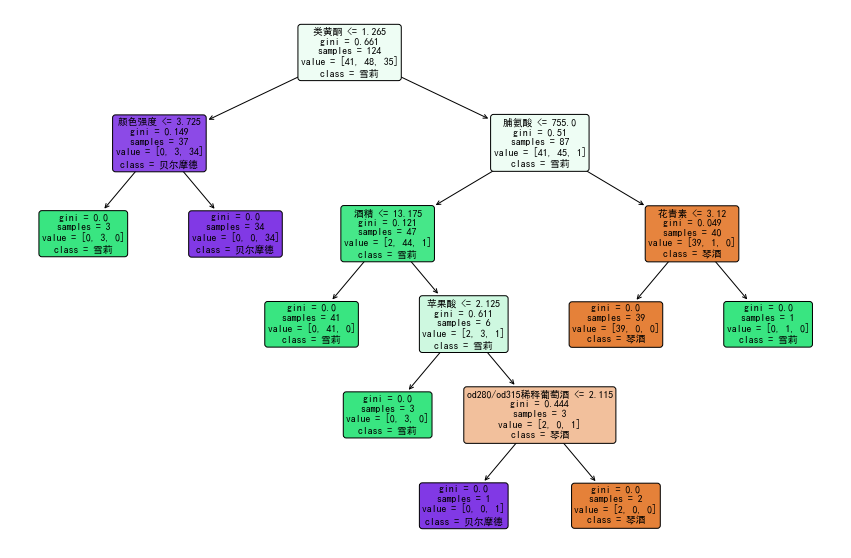

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
plt.figure(figsize=(15, 10))
tree.plot_tree(clf2
                , feature_names=feature_name
               , class_names=["琴酒", "雪莉", "贝尔摩德"]
               , filled=True
               , rounded=True)



In [27]:
clf2.score(test_X,test_y)



0.8888888888888888

In [30]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

train_X,test_X,train_y,test_y = train_test_split(X, y,test_size=0.3)

dtr = tree.ExtraTreeRegressor() # tree.DecisionTreeRegressor()
dtr.fit(train_X,train_y)

ExtraTreeRegressor()

In [31]:
dtr.score(test_X,test_y)






0.7428552750105092